## 1. Summary Statistics 

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy import stats

In [7]:
cars = pd.read_csv('C:/Users/.../.../mtcars.csv')
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
cars.sum().head(3)

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
dtype: object

In [12]:
cars.sum(axis=1).head(3)    # 横向相加

0    328.980
1    329.795
2    259.580
dtype: float64

In [8]:
cars.mean().head(3)

mpg      20.090625
cyl       6.187500
disp    230.721875
dtype: float64

In [15]:
cars.mpg.max()    # return 39 - max value
cars.mpg.idxmax()    # return 19 - the row index for max value

19

In [16]:
cars.std()    # standard deviation
cars.var()    # variance

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [17]:
cars.gear.value_counts()    # 3 happens 15 times, 4 happens 12 times

3    15
4    12
5     5
Name: gear, dtype: int64

In [20]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


------------------------------

## 2. Categorical Data

#### Group BY

In [23]:
gears_group = cars.groupby('gear')
gears_group.mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,carb
gear,,,,,,,,,,
3,16.106667,7.466667,326.300000,176.133333,3.132667,3.892600,17.692,0.200000,0.000000,2.666667
4,24.533333,4.666667,123.016667,89.500000,4.043333,2.616667,18.965,0.833333,0.666667,2.333333
5,21.380000,6.000000,202.480000,195.600000,3.916000,2.632600,15.640,0.200000,1.000000,4.400000


#### Transforming variables to categorical data

In [24]:
cars['group'] = pd.Series(cars.gear, dtype="category")    
# change cars.gear to categorical data

In [25]:
cars['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

#### Cross Tab

In [27]:
pd.crosstab(cars['am'], cars['gear'])  

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


------------------------

## 3. Correlation Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [31]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

#### Pearson - Parametric Corr

In [ ]:
# sb.pairplot(cars)

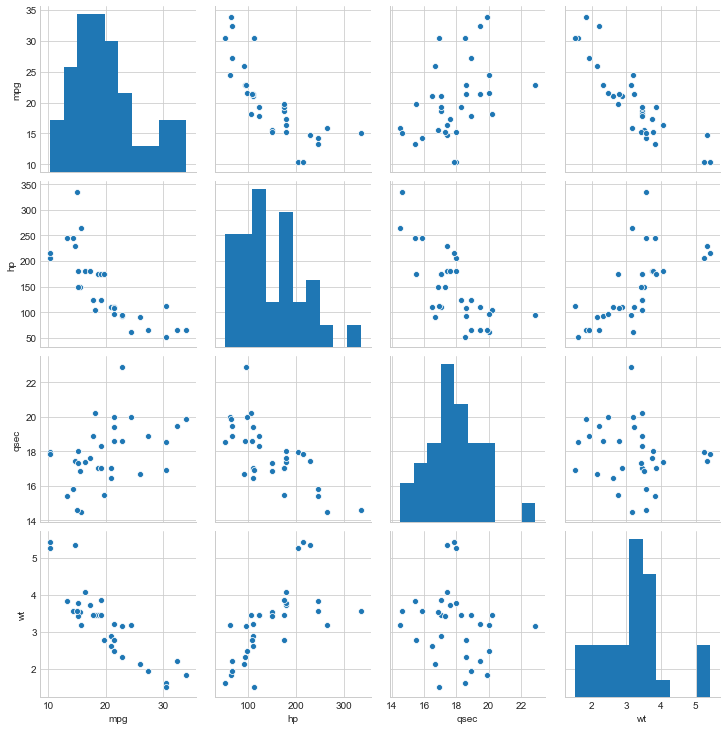

In [33]:
sb.pairplot(cars[['mpg', 'hp', 'qsec', 'wt']])

1. use Scipy

In [39]:
pearsonr_coefficient, p_value = pearsonr(cars.mpg, cars.hp)

print(round(pearsonr_coefficient,2), round(p_value,2))

-0.78 0.0


2. use Pandas

In [42]:
pdcorr = cars[['mpg', 'hp', 'qsec', 'wt']].corr()
pdcorr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


3. use Seaborn to visualize correlation

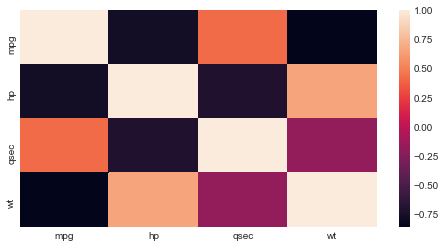

In [43]:
sb.heatmap(pdcorr, xticklabels=pdcorr.columns.values, 
           yticklabels= pdcorr.columns.values)

#### Non-parametric Correlation: Spearman's 

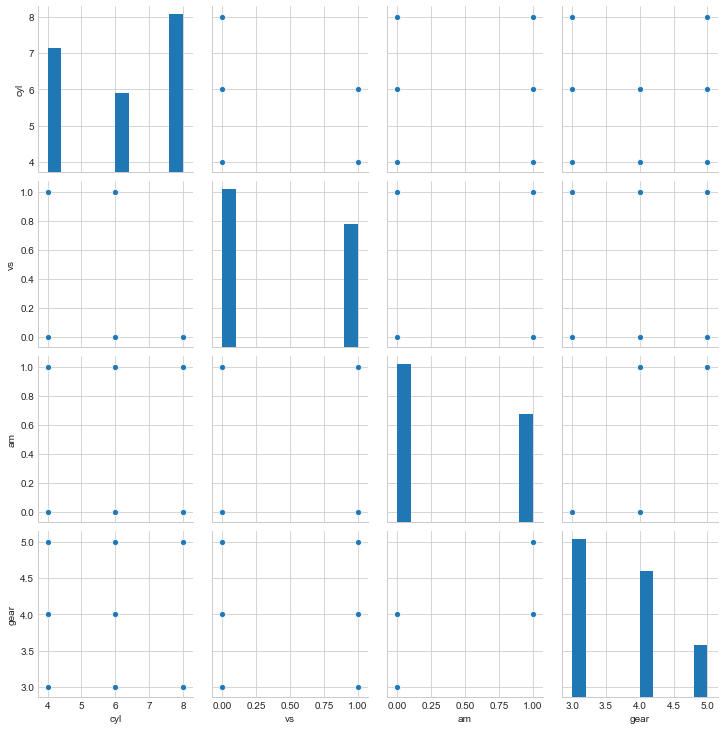

In [44]:
sb.pairplot(cars[['cyl', 'vs', 'am', 'gear']])

use Scipy

In [50]:
from scipy.stats import spearmanr

spearmanr_coefficient, p_value = spearmanr(cars.cyl, cars.vs)

print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.814


#### Chi-square test for Independence

To check if two categoricl variables are independent (related)

In [56]:
table = pd.crosstab(cars.cyl, cars.vs)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)

print ('Chi-square statistic %0.2f p_value %0.3f' % (chi2, p))    
# 1. '#' link the location and value 2. 0.2 is level of precision

Chi-square statistic 21.34 p_value 0.000


---------------------

## 4. Transform Data Distributions

normalization and standardization using sklearn

In [3]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

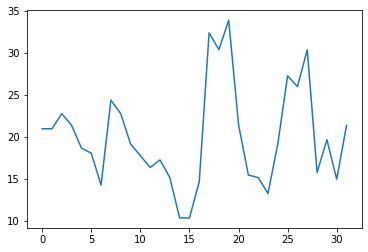

In [10]:
mpg = cars.mpg
plt.plot(mpg)

In [11]:
mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

#### Normalization

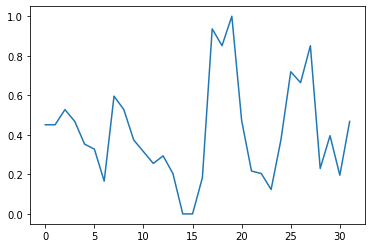

In [13]:
mpg_matrix = mpg.values.reshape(-1,1)    # transform the variable mpg into one column matrix (array)

scaled = preprocessing.MinMaxScaler()    # scale to a desired range, 0-1 by default

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

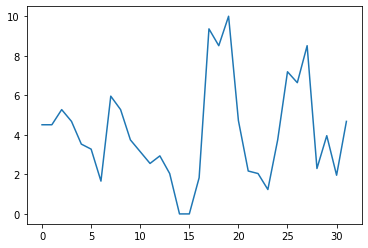

In [21]:
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))    # scale mpg to range of 0-10

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

#### Standarlization

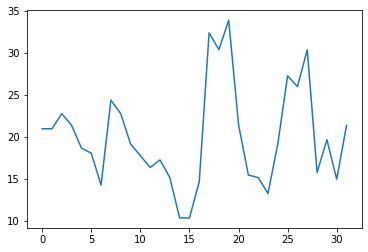

In [23]:
standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

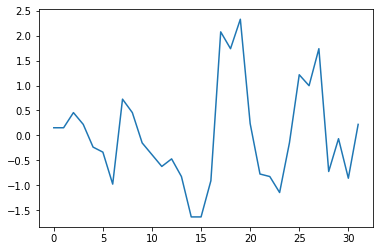

In [24]:
standardized_mpg = scale(mpg)    # mean = 0, std = 1 -> standard normalization
plt.plot(standardized_mpg)

normalization: no fixed mean or std, can select a rang;
standardization: mean =0, std =1

-----------------------

## 5. Outliers

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [27]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [29]:
df = pd.read_csv('C:/Users/.../.../iris.data.csv', header=None, sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Using Boxplot

[]

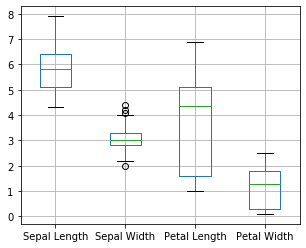

In [37]:
df.boxplot(return_type='dict')
plt.plot()

In [43]:
#Detect upper limit is 4, lower limit is 2.05 from boxlot

iris_outliers = (df['Sepal Width'] > 4) | (df['Sepal Width'] < 2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [45]:
pd.options.display.float_format = '{:.1f}'.format   # format the data to 1 decimal precision
df.describe()

# 1.5IQR  = 1.5*(3.3-2.8) = 0.75
# upper limit  = 3.3 + 0.5 = 4.05
# lower limit = 2.8 - 0.5 = 2.05

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


#### Multivariate analysis for outlier detection - based on >1 variables

In [46]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [47]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

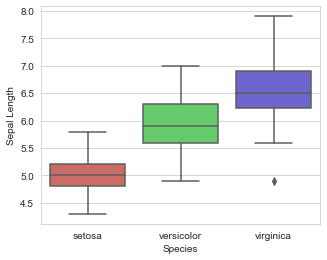

In [48]:
sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

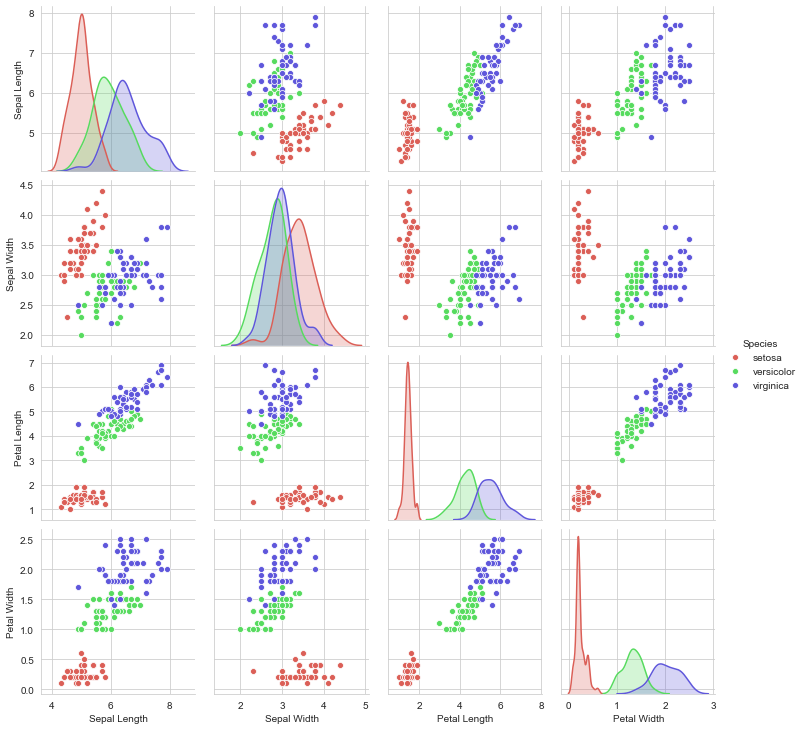

In [50]:
sb.pairplot(df, hue='Species', palette='hls')    # species is the legend of color